<h1 align='center'>Modelos Probabilísticos para Séries Temporais</h1>
<p align='center'><img src=https://dhg1h5j42swfq.cloudfront.net/2020/10/13230005/artigo-esta.jpg></p>


<p align='justify'>Será introduzido os modelos <i>Prophet</i> e <i>Markov</i>, além dos modelos <i>Fuzzy</i> para Séries temporais. Vamos comentar alguns aspectos sobre:</p>
<li>Modelos probabilísticos para Séries Temporais</li>
<li><i>Prophet</i></li>
<li>Modelos <i>Markov</i></li>
<li>Modelagem <i>Fuzzy</i></li>
<li>Modelos Estuturais Baeysianos para Séries Temporais</li>

<h3>Modelos Probabilísticos para Séries Temporais</h3>
<p align='justify'>O Modelos Probabilísticos podem nos ajudar a tomar decisões sob incerteza e em situações em que as estimativas têm que vir com confiança, como nas previsões financeiras, isso pode ser crucial. Para previsões de vendas ou fluxo de caixa, anexar probabilidades às previsões do modelo pode facilitar
para os gestores financeiros atuarem sobre as novas informações.</p>
<p align='justify'>O Modelo <i>Prophet</i> veio do <i>Facebook</i> e é baseado em modelos de decomposição com parâmetros interpretaveis. O interessante é que os parâmetros podem ser ajustados pelos analistas.</p>
<p align='justify'>Tanto o <i>Prophet</i> quanto o <i>Silverkite</i> são algoritmos que têm como objetivo séries temporais que podem ter tendências de mudança, sazonalidade e eventos recorrentes, tais como, feriados, e efeitos de longo prazo e, portanto, são adequados para muitas aplicações em Ciência de Dados, onde o foco está em tarefas como planejamento de recursos, otimização de decisões financeiras e acompanhamento do progresso para análise operacional - tarefas típicas da pesquisa operacional.</p>
<p align='justify'>Neste contexto, podemos levar em consideração as seguintes bibliotecas, além das já citadas anteriormente:</p>
<li><a href=https://pyfts.readthedocs.io/en/latest//><i>pyFTS</i></a></li>
<li><a href=https://www.tensorflow.org/probability?hl=pt-br><i>TensorFlow Probability</i></a></li>
<li><a href=https://ts.gluon.ai/><i>Gluon-TS</i></a></li>

<h3><i>Prophet</i></h3>
<p align="justify">Os autores que criaram o algoritmo escreveram que os problemas de previsão e anomalia detecção na prática envolvem a complexidade de lidar com uma variedade de problemas de previsão no <i>Facebook</i> com partes em tendências, múltiplas sazonalidades, feriados flutuantes e na confiança construída em toda a organização nessas previsões.</p>
<p align="justify">Com esses objetivos em mente, o <i>Prophet</i> foi projetado para ser escalável para muitas séries temporais, flexível o suficiente para uma ampla gama de séries temporais relevantes para os negócios, possivelmente idiossincráticas, e ao mesmo tempo intuitivo o suficiente para ser configurado por especialistas do domínio que podem ter pouco conhecimento de métodos de séries temporais. Embora o <i>Prophet</i> seja classificado como um algoritmo complexo adequado para tarefas de predições, cabe ressaltar que não existe "Bala de Prata". A performance de um modelo depende do conjunto de dados e da tarefa que for ser desempenhada.</p>

<h3><i>Modelos de Markov</i></h3>
<p align="justify">Uma cadeia de <i>Markov</i> é um modelo probabilístico que descreve uma sequência de eventos possíveis que satisfaz a propriedade de Markov.</p>
<p align="justify"><q><b>Propriedade de Markov</b>:Em uma sequência ou processo estocástico que possui a propriedade de Markov, a probabilidade de cada evento depende apenas do estado imediatamente anterior (ao invés de estados anteriores). Essas sequências ou processos também podem ser chamados de Markoviano ou Processo Markoviano.</q></p>

<h3><i>Modelagem Difusa (Fuzzy)</i></h3>
<p align="justify">A teoria dos conjuntos difusos é uma abordagem que pode lidar com problemas relacionados a julgamentos subjetivos e imprecisos. A imprecisão é inerente à linguagem cotidiana, e foi inventada para expressar e trabalhar com isso de maneira intuitiva. A lógica difusa expressa a crença subjetiva e a imprecisão. Tem sido afirmado que a teoria da probabilidade é um subconjunto da lógica difusa.</p>

<h3><i>Modelos Séries Temporais Estrutural Bayesianas</i></h3>
<p align="justify">Na inferência causal, queremos analisar o efeito de um tratamento. O tratamento pode ser qualquer ação que interaja com o sistema ou ambiente que nos interessa, desde alterar as cores de um botão em um site até o lançamento de um produto. Temos a opção de realizar a ação (por exemplo, liberar o produto), observando assim o resultado sob tratamento, ou não tomar a ação, onde observamos o resultado sob nenhum tratamento.</p>

<h3><i>Aplicações dos Modelos Probabilísticos</i></h3>
<h4><i>Prophet</i></h4>

In [1]:
# Carregando os dados das Ações do Yahoo de Jun 01 a Jun 21
from pandas_datareader.data import DataReader
from datetime import datetime
yahoo_data = DataReader('JPM', 'yahoo', datetime(2001,4,1),
                        datetime(2022,4,1))
yahoo_df = yahoo_data['Adj Close'].to_frame().reset_index('Date')

In [2]:
# Verificando os tipos de dados do DataFrame
yahoo_df.dtypes

Date         datetime64[ns]
Adj Close           float64
dtype: object

In [3]:
# Inspecionando o DataSet importado
yahoo_df.head()

,Date,Adj Close
0,2001-04-02,23.906883
1,2001-04-03,22.298796
2,2001-04-04,21.882650
3,2001-04-05,22.968950
4,2001-04-06,21.828606


In [4]:
# Carregando a Biblioteca Prophet para realizar as previsões dos dados.
from prophet import Prophet
forecaster = Prophet()
forecaster.fit(
	yahoo_df.rename(columns={"Date": "ds", "Adj Close":'y'})
)

# Temos que renomear nossas colunas ds e y para manter as convenções do Prophet. Agora temos um modelo de Prophet treinado!!!

future = forecaster.make_future_dataframe(periods=90)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\willi\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [5]:
# Lembrar que pedimos os dados até 90 dias depois!!!
future.tail()

,ds
5370,2022-06-26
5371,2022-06-27
5372,2022-06-28
5373,2022-06-29
5374,2022-06-30


In [6]:
# Inspecioando os dados preditos!!!
forecast = forecaster.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

C:\Users\willi\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\willi\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
5370,2022-06-26,150.335461,139.997348,160.901550
5371,2022-06-27,150.240244,140.795982,160.914958
5372,2022-06-28,150.341087,140.179815,160.330078
5373,2022-06-29,150.358625,140.506489,160.933731
5374,2022-06-30,150.444459,140.228435,160.331722


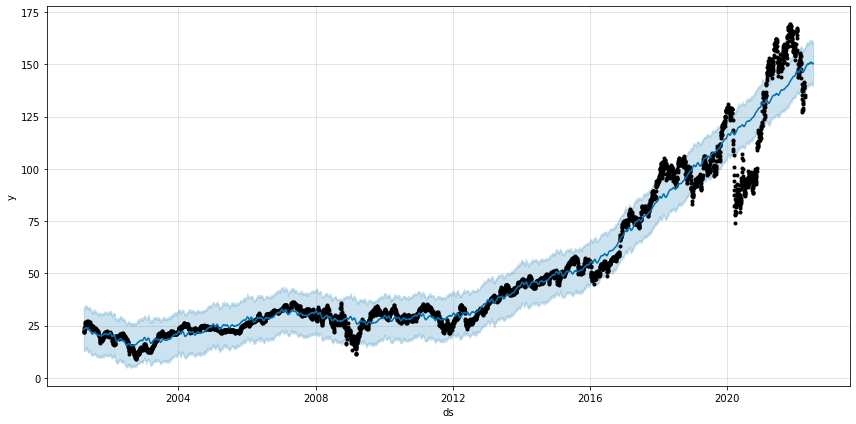

In [7]:
# Plotando os dados em um Gráfico
forecaster.plot(forecast, figsize=(12, 6));

<p align="justify">Os dados reais são apresentados na linha mais grossa, enquanto a previsão é está na linha mais fina. Os intervalos de confiança superior e inferior estão em torno da previsão. Como podemos observar é muito fácil obter uma linha de previsão utilizando o <i>Prophet</i>.</p>

<h4><i>Modelo de Markov</i></h4>

In [8]:
# Importando as Bibliotecas necessárias e alterando alguns parâmentros de Visualização
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "17"

C:\Users\willi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\willi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [9]:
# Carregando os dados
dta = pd.read_stata('https://www.stata-press.com/data/r14/rgnp.dta').iloc[1:]
dta.index = pd.DatetimeIndex(dta.date, freq='QS')
dta_hamilton = dta.rgnp

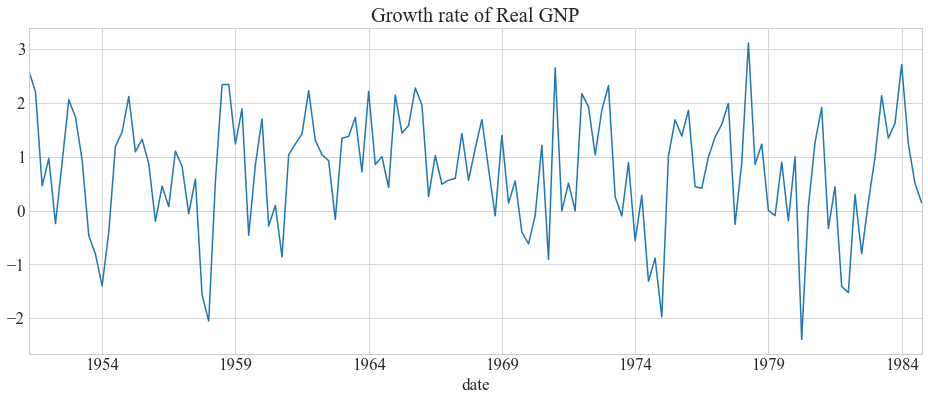

In [10]:
# Plotando os dados
dta_hamilton.plot(title='Growth rate of Real GNP', figsize=(16,6))
plt.show()

<p align="justify">Os regimes de Markov utilizam probabilidade para localizar trocas de regime em séries temporais não lineares. O método foi operacionalizado por Hamilton (1989), considerando um modelo autorregressivo com mudanças de regime não periódicas. Em cada regime há diferentes relações, representadas pelos sinais e pelos valores dos coeficientes das variáveis independentes. A mudança de regime pode acontecer em diferentes momentos da série temporal e repetir-se, existindo uma alternância entre os regimes dentro do intervalo da série. Assim, um regime pode acontecer em um período, ser substituído em outro e voltar a acontecer no próximo momento. Isto é exatamente o que acontece quando existem dois regimes em uma série</p>
<p align="justify">A determinação do parâmetro <i>order</i> é fundamental no conjunto de dados proveniente de uma Cadeia de Markov.

In [14]:
# Vamos implementar o AutoRegressor MARKOV com 2 regimes e com ordem m=4.
mod_hamilton = sm.tsa.MarkovAutoregression(dta_hamilton, k_regimes=2, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()

# Imprimindo o Sumário
print(res_hamilton.summary())

                         Markov Switching Model Results                         
Dep. Variable:                     rgnp   No. Observations:                  131
Model:             MarkovAutoregression   Log Likelihood                -181.263
Date:                  Tue, 05 Apr 2022   AIC                            380.527
Time:                          08:24:39   BIC                            406.404
Sample:                      04-01-1951   HQIC                           391.042
                           - 10-01-1984                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3588      0.265     -1.356      0.175      -0.877       0.160
                             Regime 

In [15]:
res_hamilton.expected_durations

array([ 4.07604747, 10.42589382])

<p align="justify">A saída está representada em trimestres. Então a recessão esperada é aproximadamente 4 trimestres, ou seja, 1 ano, e a expansão de 10 trimestres (dois anos e meio).</p>
<p align="justify"> Em seguida, vamos traçar a probabilidade de recessão em cada ponto no tempo. No entanto, isso é mais informativo se sobrepusermos os indicadores de recessão do National Bureau of Economic Research (NBER), que podemos carregar com o <i>pandas-dataloader</i>.

In [17]:
from pandas_datareader.data import DataReader
from datetime import datetime
usrec = DataReader('USREC', 'fred', start=datetime(1947, 1, 1),
                   end=datetime(2013, 4, 1))

usrec.head()

,USREC
DATE,
1947-01-01,0
1947-02-01,0
1947-03-01,0
1947-04-01,0
1947-05-01,0


<p align='justify'> Vemos que nas primeiras linhas, não ocorreu recessão, de acordo com os indicadores NBER. Vamos plotar os indicadores de recessão NBER em comparação com os valores preditos.</p>

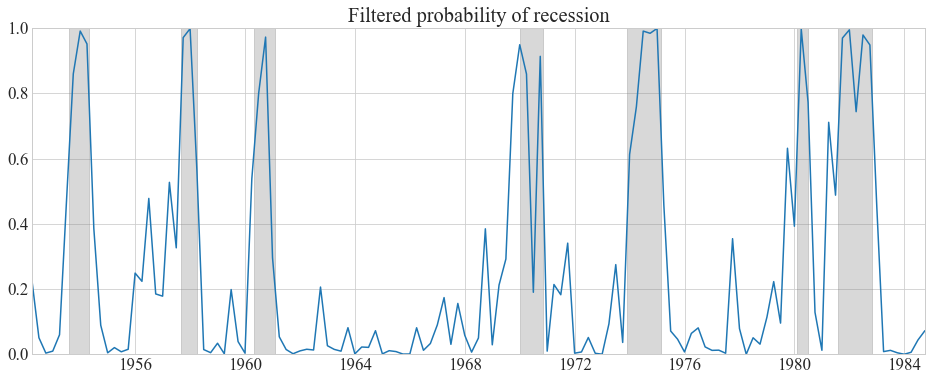

In [20]:
_, ax = plt.subplots(1, figsize=(16,6))
ax.plot(res_hamilton.filtered_marginal_probabilities[0])
ax.fill_between(
    usrec.index, 0, 1, where=usrec['USREC'].values,
    color='gray', alpha=0.3
)
ax.set(
    xlim=(dta_hamilton.index[4], dta_hamilton.index[-1]),
    ylim=(0, 1),
    title='Filtered probability of recession'
)
plt.show()

<p align="justify">Podemos ver que parece haver uma boa correspondência entre as previsões do modelo e indicadores reais de recessão. Infelizmente, a implementação de <i>statsmodels</i> não fornece a funcionalidade para previsão ou previsão fora da amostra.</p>

<h4><i>Séries Temporais Difusas (Fuzzy)</i></h4>

In [41]:
from pyFTS.data import NASDAQ, SP500
from pyFTS.common import Transformations
from statsmodels.tsa.stattools import adfuller
from pyFTS.models import song
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures
from pyFTS.benchmarks import ResidualAnalysis as ra


# Carregandos os dados
datasets = {
	"SP500": SP500.get_data()[11500:16000],
	"NASDAQ": NASDAQ.get_data()
}

# Selecionando 50% para treinamento
train_split = 2000

# Será necessário preprocessar porque o processo parte do princípio que é estacionário.
# Vamos definir uma primeira ordem de diferenciação para preprocessar.

tdiff = Transformations.Differential(1)

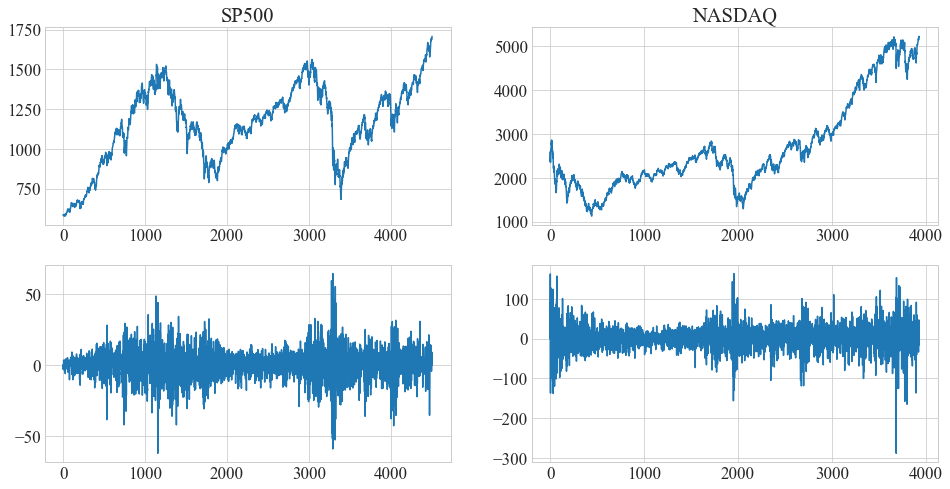

In [25]:
# Vamos plotar a Série Temporais e a Transformação
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
for count, (dataset_name, dataset) in enumerate(datasets.items()):
    dataset_diff = tdiff.apply(dataset)
    ax[0][count].plot(dataset)
    ax[1][count].plot(dataset_diff)
    ax[0][count].set_title(dataset_name)

In [29]:
# Vemos que o teste de ADF nos já segurança para ver que a Série se transformou em Estacionária.

rows = []

for count, (dataset_name, dataset) in enumerate(datasets.items()):
    row = [dataset_name]
    result = adfuller(dataset)
    row.extend([result[0],result[1]])
    row.extend([value for key, value in result[4].items()])
    rows.append(row)

pd.DataFrame(rows, columns=['Dataset','ADF Statistic','p-value','Cr. Val. 1%','Cr. Val. 5%','Cr. Val. 10%'])

,Dataset,ADF Statistic,p-value,Cr. Val. 1%,Cr. Val. 5%,Cr. Val. 10%
0,SP500,-1.747171,0.406987,-3.431811,-2.862186,-2.567114
1,NASDAQ,0.476224,0.984132,-3.432022,-2.862279,-2.567163


In [31]:
models = {}
for count, (dataset_name, dataset) in enumerate(datasets.items()):
    partitioner_diff = Grid.GridPartitioner(data=dataset, npart=15,
                                            transformation=tdiff)
    model = song.ConventionalFTS(partitioner=partitioner_diff)
    model.name = dataset_name
    model.append_transformation(tdiff)
    model.fit(
        dataset[:train_split],
        order=1
)
    models[dataset_name] = model

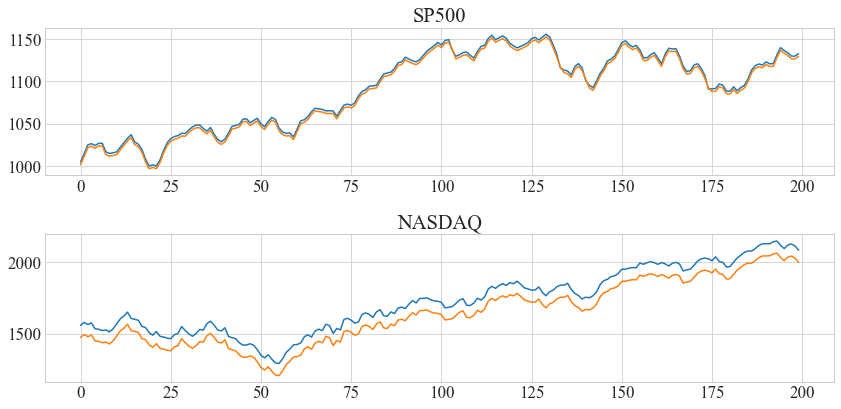

In [32]:
_, ax = plt.subplots(nrows=2, ncols=1, figsize=[12, 6])
for count, (dataset_name, dataset) in enumerate(datasets.items()):
    ax[count].plot(dataset[train_split:train_split+200])
    model = models[dataset_name]
    forecasts = model.predict(dataset[train_split:train_split+200],
                          steps_ahead=1)
    ax[count].plot(forecasts)
    ax[count].set_title(dataset_name)
plt.tight_layout()

<p align="justify">Novamente, iteramos nos dois conjuntos de dados. Desta vez, plotamos os valores originais no conjunto de teste (200 pontos) contra valores estimados previstos um passo à frente. Observe que os modelos não estão atualizados com base em novos dados durante a previsão. Olhando para esses gráficos, as previsões parecem bastante promissoras.</p>

In [36]:
rows = []
for count, (dataset_name, dataset) in enumerate(datasets.items()):
    row = [dataset_name]
    test = dataset[train_split:train_split+200]
    model = models[dataset_name]
    row.extend(Measures.get_point_statistics(test, model))
    rows.append(row)

pd.DataFrame(
	    rows,columns=["Dataset", "RMSE", "MAPE", "Theil's U"]
    ).set_index("Dataset")

,RMSE,MAPE,Theil's U
Dataset,,,
SP500,6.76,0.52,1.22
NASDAQ,90.85,5.14,3.79


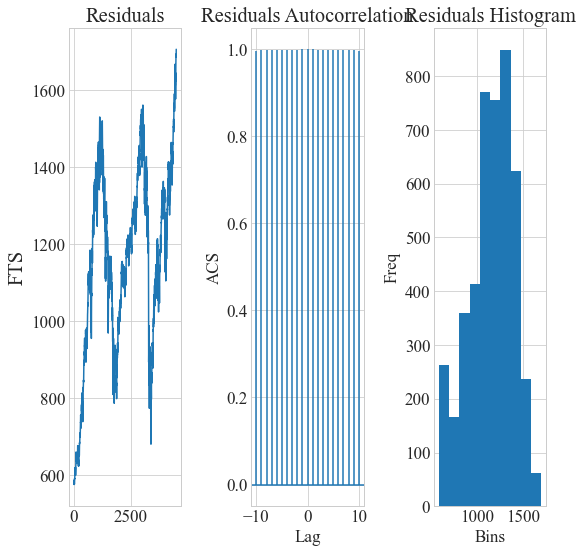

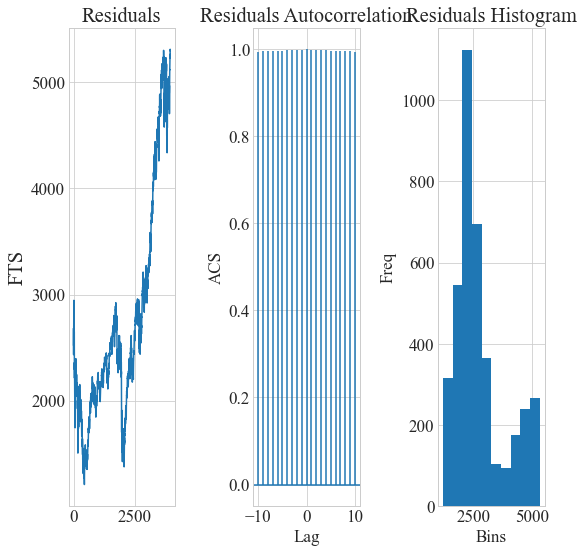

In [57]:

for count, (dataset_name, dataset) in enumerate(datasets.items()):
	model = models[dataset_name]
	ra.plot_residuals(dataset, [model])
plt.show()